In [1]:
import torch
import Augmentor
from PIL import Image, ImageFilter
import numpy as np
import cv2
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from unet import UNET, train
from torch import nn

In [2]:
path = "./Image_Sequences/PhC-C2DL-PSC/Sequence 1/t098.tif"
mask_path = "./Image_Sequences/PhC-C2DL-PSC/Sequence 1 Masks/t098mask.tif"

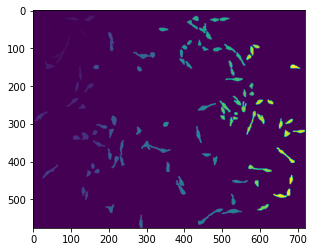

In [3]:
import matplotlib.image as mpimg
img=mpimg.imread(mask_path)
imgplot = plt.imshow(img)
plt.show()

image = np.array(Image.open(path))
mask = np.array(Image.open(mask_path))

In [29]:
#image = np.array(Image.open(path))
#mask = np.array(Image.open(mask_path))

image = mpimg.imread(path)
#mask = Image.open(mask_path)
mask = mpimg.imread(mask_path).astype(np.uint8)
#mask_cv = cv2.imread(mask_path)

In [30]:
image

array([[ 0, 81, 80, ..., 72, 72, 72],
       [83, 81, 80, ..., 72, 72, 72],
       [83, 81, 80, ..., 72, 72, 72],
       ...,
       [95, 95, 98, ..., 80, 79, 79],
       [95, 95, 98, ..., 80, 79, 79],
       [95, 95, 98, ..., 80, 79, 79]], dtype=uint8)

In [31]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

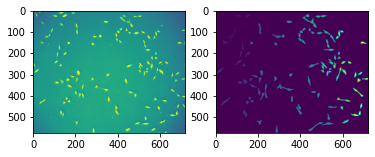

In [32]:
fig=plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(image)
fig.add_subplot(1, 2, 2)
plt.imshow(mask)


In [104]:
# Define the demo dataset
class DogDataset3(Dataset):
    '''
    Sample dataset for Augmentor demonstration.
    The dataset will consist of just one sample image.
    '''

    def __init__(self, image, mask):
        self.image = image
        self.mask = mask

    def __len__(self):
        return 1 # return 1 as we have only one image

    def __getitem__(self, idx):
        # Returns the augmented image
        
        # Initialize the pipeline
        #p = Augmentor.DataPipeline([[np.array(self.image)]], labels=[[np.array(self.mask)]])
        p = Augmentor.DataPipeline([[np.array(self.image), np.array(self.mask)]])
        #p = Augmentor.DataPipeline([[[np.array(self.image)], [np.array(self.mask)]]])

        #p = Augmentor.DataPipeline([[np.array(self.image)]])
        #p = Augmentor.DataPipeline([[self.image]])

        
        # Apply augmentations
        p.rotate(0.5, max_left_rotation=10, max_right_rotation=10) # rotate the image with 50% probability
        p.shear(0.5, max_shear_left = 10, max_shear_right = 10) # shear the image with 50% probability
        p.zoom_random(0.5, percentage_area=0.7) # zoom randomly with 50% probability

        # Sample from augmentation pipeline
        images_aug = p.sample(idx)
        
        # Get augmented image
        augmented_image = images_aug
        
        # convert to tensor and return the result
        #return TF.to_tensor(augmented_image)
        return torch.tensor(augmented_image)

# Initialize the dataset, pass the augmentation pipeline as an argument to init function
train_ds = DogDataset3(image, mask)

# Initialize the dataloader
#trainloader = DataLoader(train_ds, batch_size=10, shuffle=True, num_workers=0)

#valid_dl = DataLoader(train_ds, batch_size=1, shuffle=True, num_workers=0)

train_ds

In [108]:
for x in trainloader:
    print(x)

tensor([], size=(1, 0))


In [76]:
train_ds[0]

tensor([])

In [88]:
for x, y in train_ds[10]:
    print(x
          

tensor([[120, 121, 121,  ..., 135, 135, 135],
        [121, 121, 121,  ..., 135, 135, 135],
        [121, 121, 121,  ..., 135, 135, 135],
        ...,
        [101, 101, 101,  ..., 143, 141, 141],
        [101, 101, 101,  ..., 143, 141, 141],
        [101, 101, 101,  ..., 143, 141, 141]], dtype=torch.uint8)
tensor([[106, 106, 107,  ...,  97,  96,  98],
        [107, 105, 108,  ...,  98,  97,  97],
        [109, 106, 107,  ...,  98,  98,  96],
        ...,
        [131, 131, 132,  ...,  98,  96,  96],
        [132, 131, 131,  ...,  97,  95,  95],
        [132, 132, 130,  ...,  96,  96,  96]], dtype=torch.uint8)
tensor([[ 0, 81, 80,  ..., 72, 72, 72],
        [83, 81, 80,  ..., 72, 72, 72],
        [83, 81, 80,  ..., 72, 72, 72],
        ...,
        [95, 95, 98,  ..., 80, 79, 79],
        [95, 95, 98,  ..., 80, 79, 79],
        [95, 95, 98,  ..., 80, 79, 79]], dtype=torch.uint8)
tensor([[106, 105, 106,  ...,  90,  89,  90],
        [105, 104, 105,  ...,  89,  89,  90],
        [106, 105

In [89]:
np.shape(x)

torch.Size([576, 720])

In [78]:
i = 10
x, y = train_ds[i]
fig=plt.figure()
fig.add_subplot(2, 2, 1)
plt.imshow(image)
fig.add_subplot(2, 2, 2)
plt.imshow(mask)
fig.add_subplot(2, 2, 3)
plt.imshow(train_ds[i][0][0])
fig.add_subplot(2, 2, 4)
plt.imshow(train_ds[i][0][1])

ValueError: too many values to unpack (expected 2)

In [43]:
len(train_ds[:])

576

In [ ]:
typ

In [62]:
type(train_ds)
#train_ds[0].shape()
np.shape(train_ds[0])


torch.Size([1, 2, 576, 720])

In [8]:
model = UNET(1, 3).to('cpu')

In [10]:
def acc_fn(y, y_true):
    return 0

In [70]:
optimizer = torch.optim.Adam(model.parameters(),eps=0.000001,lr=0.0001,
                                 betas=(0.9,0.999),weight_decay=0.0001)
loss = nn.CrossEntropyLoss()
train(model, trainloader, valid_dl, loss, optimizer, acc_fn, 1)

Epoch 0/0
----------


ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
len(trainloader.data_queue)

In [ ]:


# Initialize pipeline
p = Augmentor.DataPipeline([[np.array(image), np.array(mask)]])

# Apply augmentations
p.rotate(1, max_left_rotation=3, max_right_rotation=3)
p.shear(1, max_shear_left = 3, max_shear_right = 3)
p.zoom_random(1, percentage_area=0.9)

# Sample from augmentation pipeline
images_aug = p.sample(1)

# Access augmented image and mask
augmented_image = images_aug[0][0]
augmented_mask = images_aug[0][1]